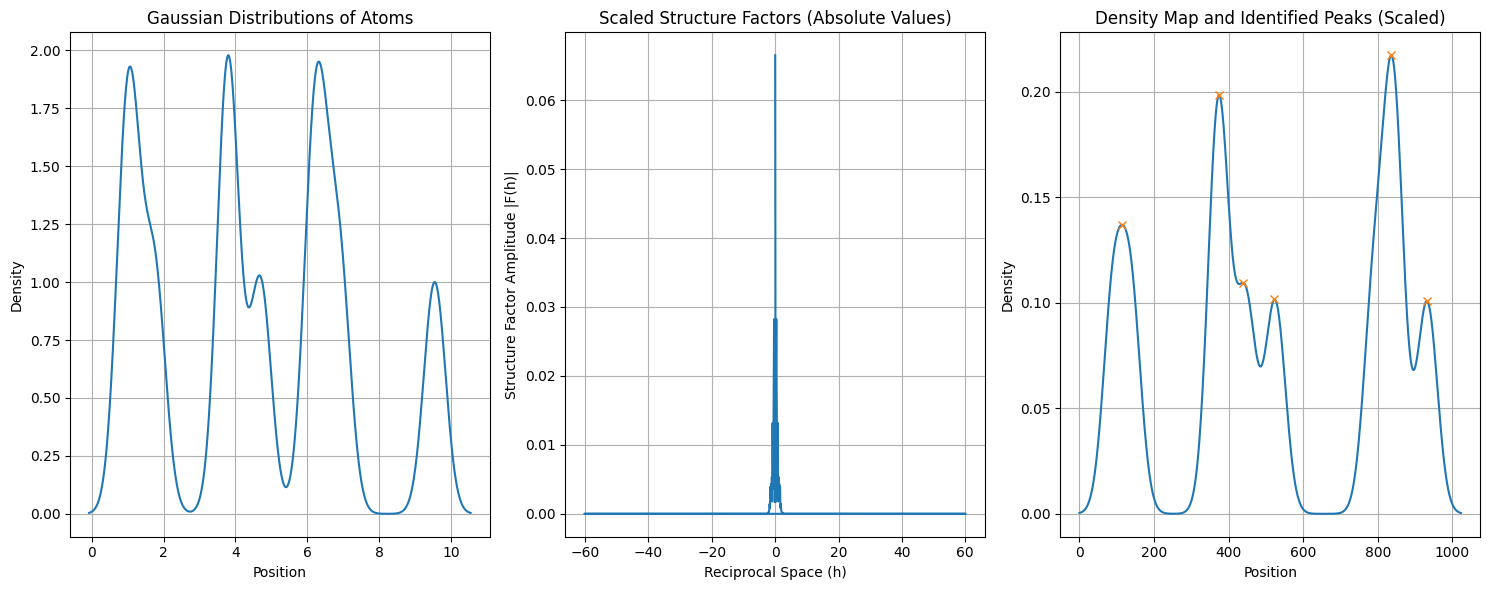

array([114, 375, 438, 523, 836, 932], dtype=int64)

In [12]:
# Set the number of atoms
num_atoms = 10  # Change this to your desired number of atoms

# Generate random atomic positions for the specified number of atoms
atomic_positions = np.sort(np.random.rand(num_atoms) * 10)

# Step 1 (Modified): Convert Discrete Atom Points into Gaussians Centered on Each Atom
# Define a Gaussian function
def gaussian(x, mu, sigma):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))

# Generate a Gaussian distribution for each atom
sigma = 0.3  # Standard deviation for the Gaussian
x_range = np.linspace(min(atomic_positions) - 1, max(atomic_positions) + 1, N)
atom_distributions = np.zeros(N)
for pos in atomic_positions:
    atom_distributions += gaussian(x_range, pos, sigma)

# Step 2 (Revised): Scale Structure Factor Amplitude by 1/num_of_atoms
scale_factor = 1 / num_atoms
F_h_scaled = F_h_gaussian * scale_factor

# Step 3: Convert Scaled MTZ to MAP using FFT
rho_x_scaled = fft(F_h_scaled, N)

# Step 4: Identify Peaks in the Map (same as before)
peaks_scaled, _ = find_peaks(np.real(rho_x_scaled))

# Plot the updated results
plt.figure(figsize=(15, 6))

# Plotting Gaussian atomic distributions (same as before)
plt.subplot(1, 3, 1)
plt.plot(x_range, atom_distributions)
plt.title('Gaussian Distributions of Atoms')
plt.xlabel('Position')
plt.ylabel('Density')
plt.grid(True)

# Plotting structure factors (Scaled)
plt.subplot(1, 3, 2)
plt.plot(h, np.abs(F_h_scaled))
plt.title('Scaled Structure Factors (Absolute Values)')
plt.xlabel('Reciprocal Space (h)')
plt.ylabel('Structure Factor Amplitude |F(h)|')
plt.grid(True)

# Plotting spatial density map with identified peaks (Scaled)
plt.subplot(1, 3, 3)
plt.plot(np.real(rho_x_scaled))
plt.plot(peaks_scaled, np.real(rho_x_scaled)[peaks_scaled], "x")
plt.title('Density Map and Identified Peaks (Scaled)')
plt.xlabel('Position')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()

peaks_scaled  # Return identified peak positions for reference



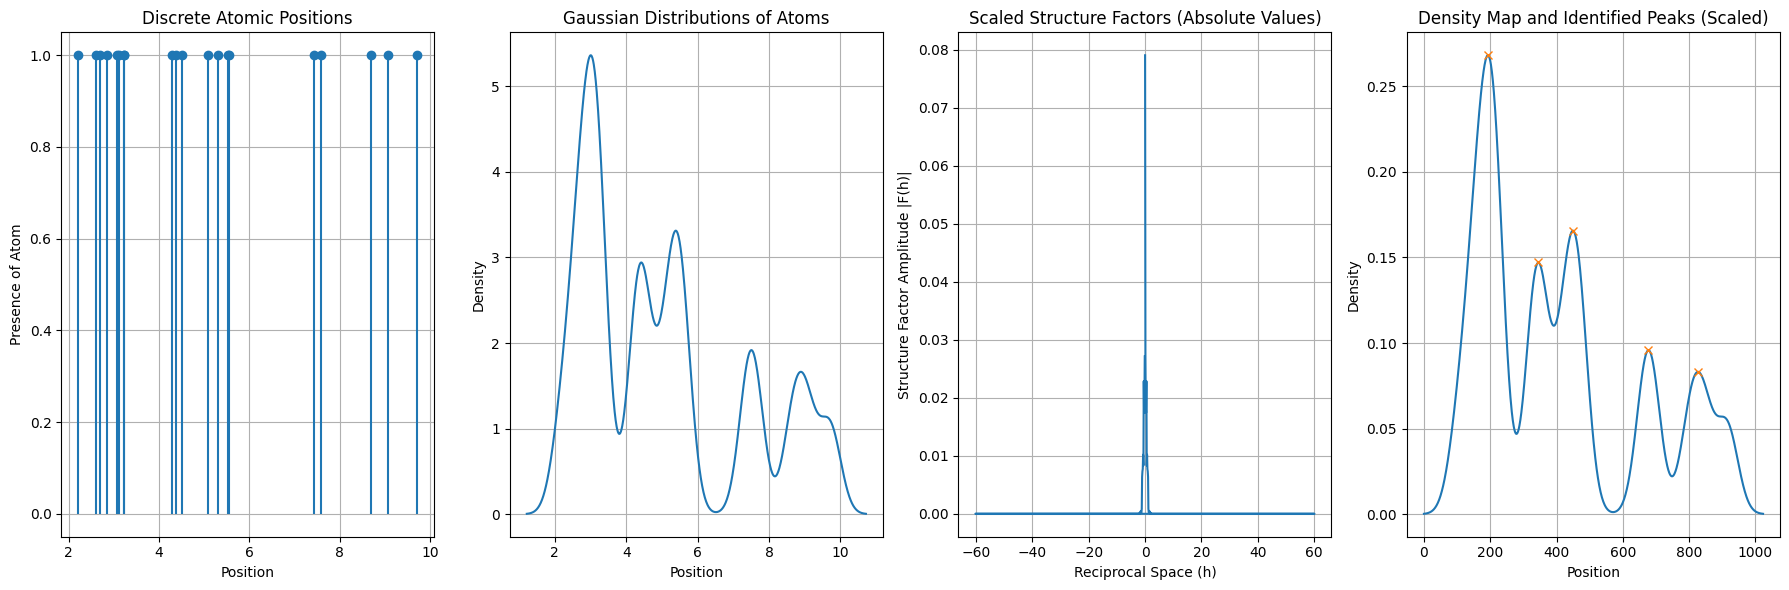

array([193, 345, 449, 677, 827], dtype=int64)

In [15]:
# Set the number of atoms
num_atoms = 20  # Adjusted to 10 atoms

# Generate random atomic positions for the specified number of atoms
atomic_positions = np.sort(np.random.rand(num_atoms) * 10)

# Step 1: Convert Discrete Atom Points into Gaussians Centered on Each Atom
def gaussian(x, mu, sigma):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))

sigma = 0.3  # Standard deviation for the Gaussian
x_range = np.linspace(min(atomic_positions) - 1, max(atomic_positions) + 1, N)
atom_distributions = np.zeros(N)
for pos in atomic_positions:
    atom_distributions += gaussian(x_range, pos, sigma)

# Step 2: Scale Structure Factor Amplitude by 1/num_of_atoms
scale_factor = 1 / num_atoms
F_h_gaussian = ifft(atom_distributions, N)  # Compute the structure factors
F_h_scaled = F_h_gaussian * scale_factor

# Step 3: Convert Scaled MTZ to MAP using FFT
rho_x_scaled = fft(F_h_scaled, N)

# Step 4: Identify Peaks in the Map
peaks_scaled, _ = find_peaks(np.real(rho_x_scaled))

# Plot the updated results
plt.figure(figsize=(18, 6))

# Plotting discrete atomic positions
plt.subplot(1, 4, 1)
plt.stem(atomic_positions, np.ones_like(atomic_positions), basefmt=" ")
plt.title('Discrete Atomic Positions')
plt.xlabel('Position')
plt.ylabel('Presence of Atom')
plt.grid(True)

# Plotting Gaussian atomic distributions
plt.subplot(1, 4, 2)
plt.plot(x_range, atom_distributions)
plt.title('Gaussian Distributions of Atoms')
plt.xlabel('Position')
plt.ylabel('Density')
plt.grid(True)

# Plotting scaled structure factors
plt.subplot(1, 4, 3)
plt.plot(h, np.abs(F_h_scaled))
plt.title('Scaled Structure Factors (Absolute Values)')
plt.xlabel('Reciprocal Space (h)')
plt.ylabel('Structure Factor Amplitude |F(h)|')
plt.grid(True)

# Plotting spatial density map with identified peaks
plt.subplot(1, 4, 4)
plt.plot(np.real(rho_x_scaled))
plt.plot(peaks_scaled, np.real(rho_x_scaled)[peaks_scaled], "x")
plt.title('Density Map and Identified Peaks (Scaled)')
plt.xlabel('Position')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()

peaks_scaled  # Return identified peak positions for reference
